**Project: Build an ANN to identify ferromagnetic phase transitions in Isisng simulations**

- ANN should find the correct change temperature for the phase transition 
- For purposes of this project T_c = 2.6. True value is T_c = 2.26 further discussion on this at the bottom

In [1]:
# Packages 
import numpy as np

import tensorflow
import tensorflow.python.keras

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

In [79]:
# Load Data and randomize
data = np.loadtxt('Ising_Configs.dat')
np.random.shuffle(data)

In [110]:
# prep data and assign train and test data
X = data[:,0:400] #spins
temp = data[:, 400]
N =len(temp)
T_c = 2.6
Y = np.zeros([N,2])

#
for i in range(len(temp)):
    if temp[i] < T_c:
        Y[i, 0] = 1 # cold
    else:
        Y[i, 1] = 1 # hot


        
X_train = X[:N*8//10,:]
X_test = X[N*8//10:,:]
Y_train = Y[:N*8//10,:]
Y_test = Y[N*8//10:,:]

In [111]:
# Layers
N_hid = 10
N_in = 400
N_out = 2

In [112]:
# Create Model and layers
model = Sequential()
model.add(Dense(N_hid, input_dim=N_in, activation='sigmoid'))
model.add(Dense(N_hid, input_dim=N_in, activation='relu'))
model.add(Dense(N_out, activation='softmax'))

In [113]:
# Compile the model and assign loss function
# mean_absolute_percentage_error performs best but further testing is needed
model.compile(loss='mean_absolute_percentage_error', optimizer='Adam', metrics=['accuracy'])

In [114]:
# Run model
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=100, batch_size=100)

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 2s 230us/sample - loss: 174396703.9000 - accuracy: 0.6421 - val_loss: 134653230.0000 - val_accuracy: 0.8395
Epoch 2/100
8000/8000 [==============================] - 0s 46us/sample - loss: 104975888.7000 - accuracy: 0.8664 - val_loss: 86968348.0000 - val_accuracy: 0.8810
Epoch 3/100
8000/8000 [==============================] - 0s 40us/sample - loss: 73944938.9500 - accuracy: 0.8924 - val_loss: 71146395.2000 - val_accuracy: 0.8860
Epoch 4/100
8000/8000 [==============================] - 0s 44us/sample - loss: 62328623.3250 - accuracy: 0.8972 - val_loss: 65088942.8000 - val_accuracy: 0.8870
Epoch 5/100
8000/8000 [==============================] - 0s 44us/sample - loss: 56967457.3750 - accuracy: 0.9011 - val_loss: 62372482.4000 - val_accuracy: 0.8900
Epoch 6/100
8000/8000 [==============================] - 0s 43us/sample - loss: 53976668.1250 - accuracy: 0.9039 - val_loss: 60756199.2000

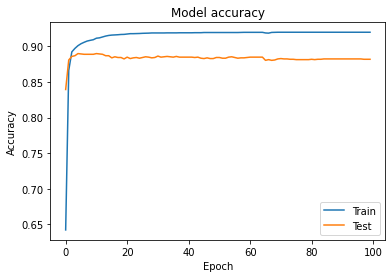

In [115]:
# Plot
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

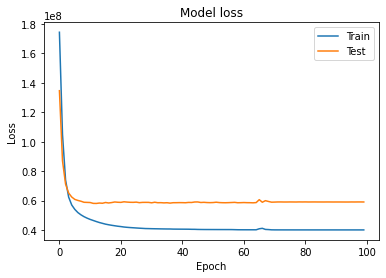

In [116]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

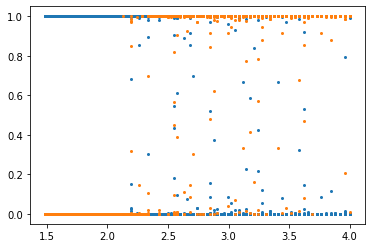

In [117]:
# Use the model for prediction
y_pred = model.predict(X_test)

merg = np.zeros(6000).reshape(2000,3)
merg[:, 0:2] = y_pred
merg[:, 2] = temp[N*8//10:,]
plt.plot(temp[N*8//10:,],y_pred,'o', markersize = 2)

# If using T_c = 2.26 The prediction looks to be right around T = 2.26

In [120]:
# Sort the prediction values
merg = merg[merg[:,2].argsort()]

# This is a hacky way to get the avgs 
avgs_merg_1 = []

i = 0
j = 200

while j <= 2000:
    avgs = np.sum(merg[i:j,1])/200
    avgs_merg_1.append(avgs)
    i+=200
    j+=200



avgs_merg_0 = []

i = 0
j = 200

while j <= 2000:
    avgs = np.sum(merg[i:j,0])/200
    avgs_merg_0.append(avgs)
    i+=200
    j+=200

10

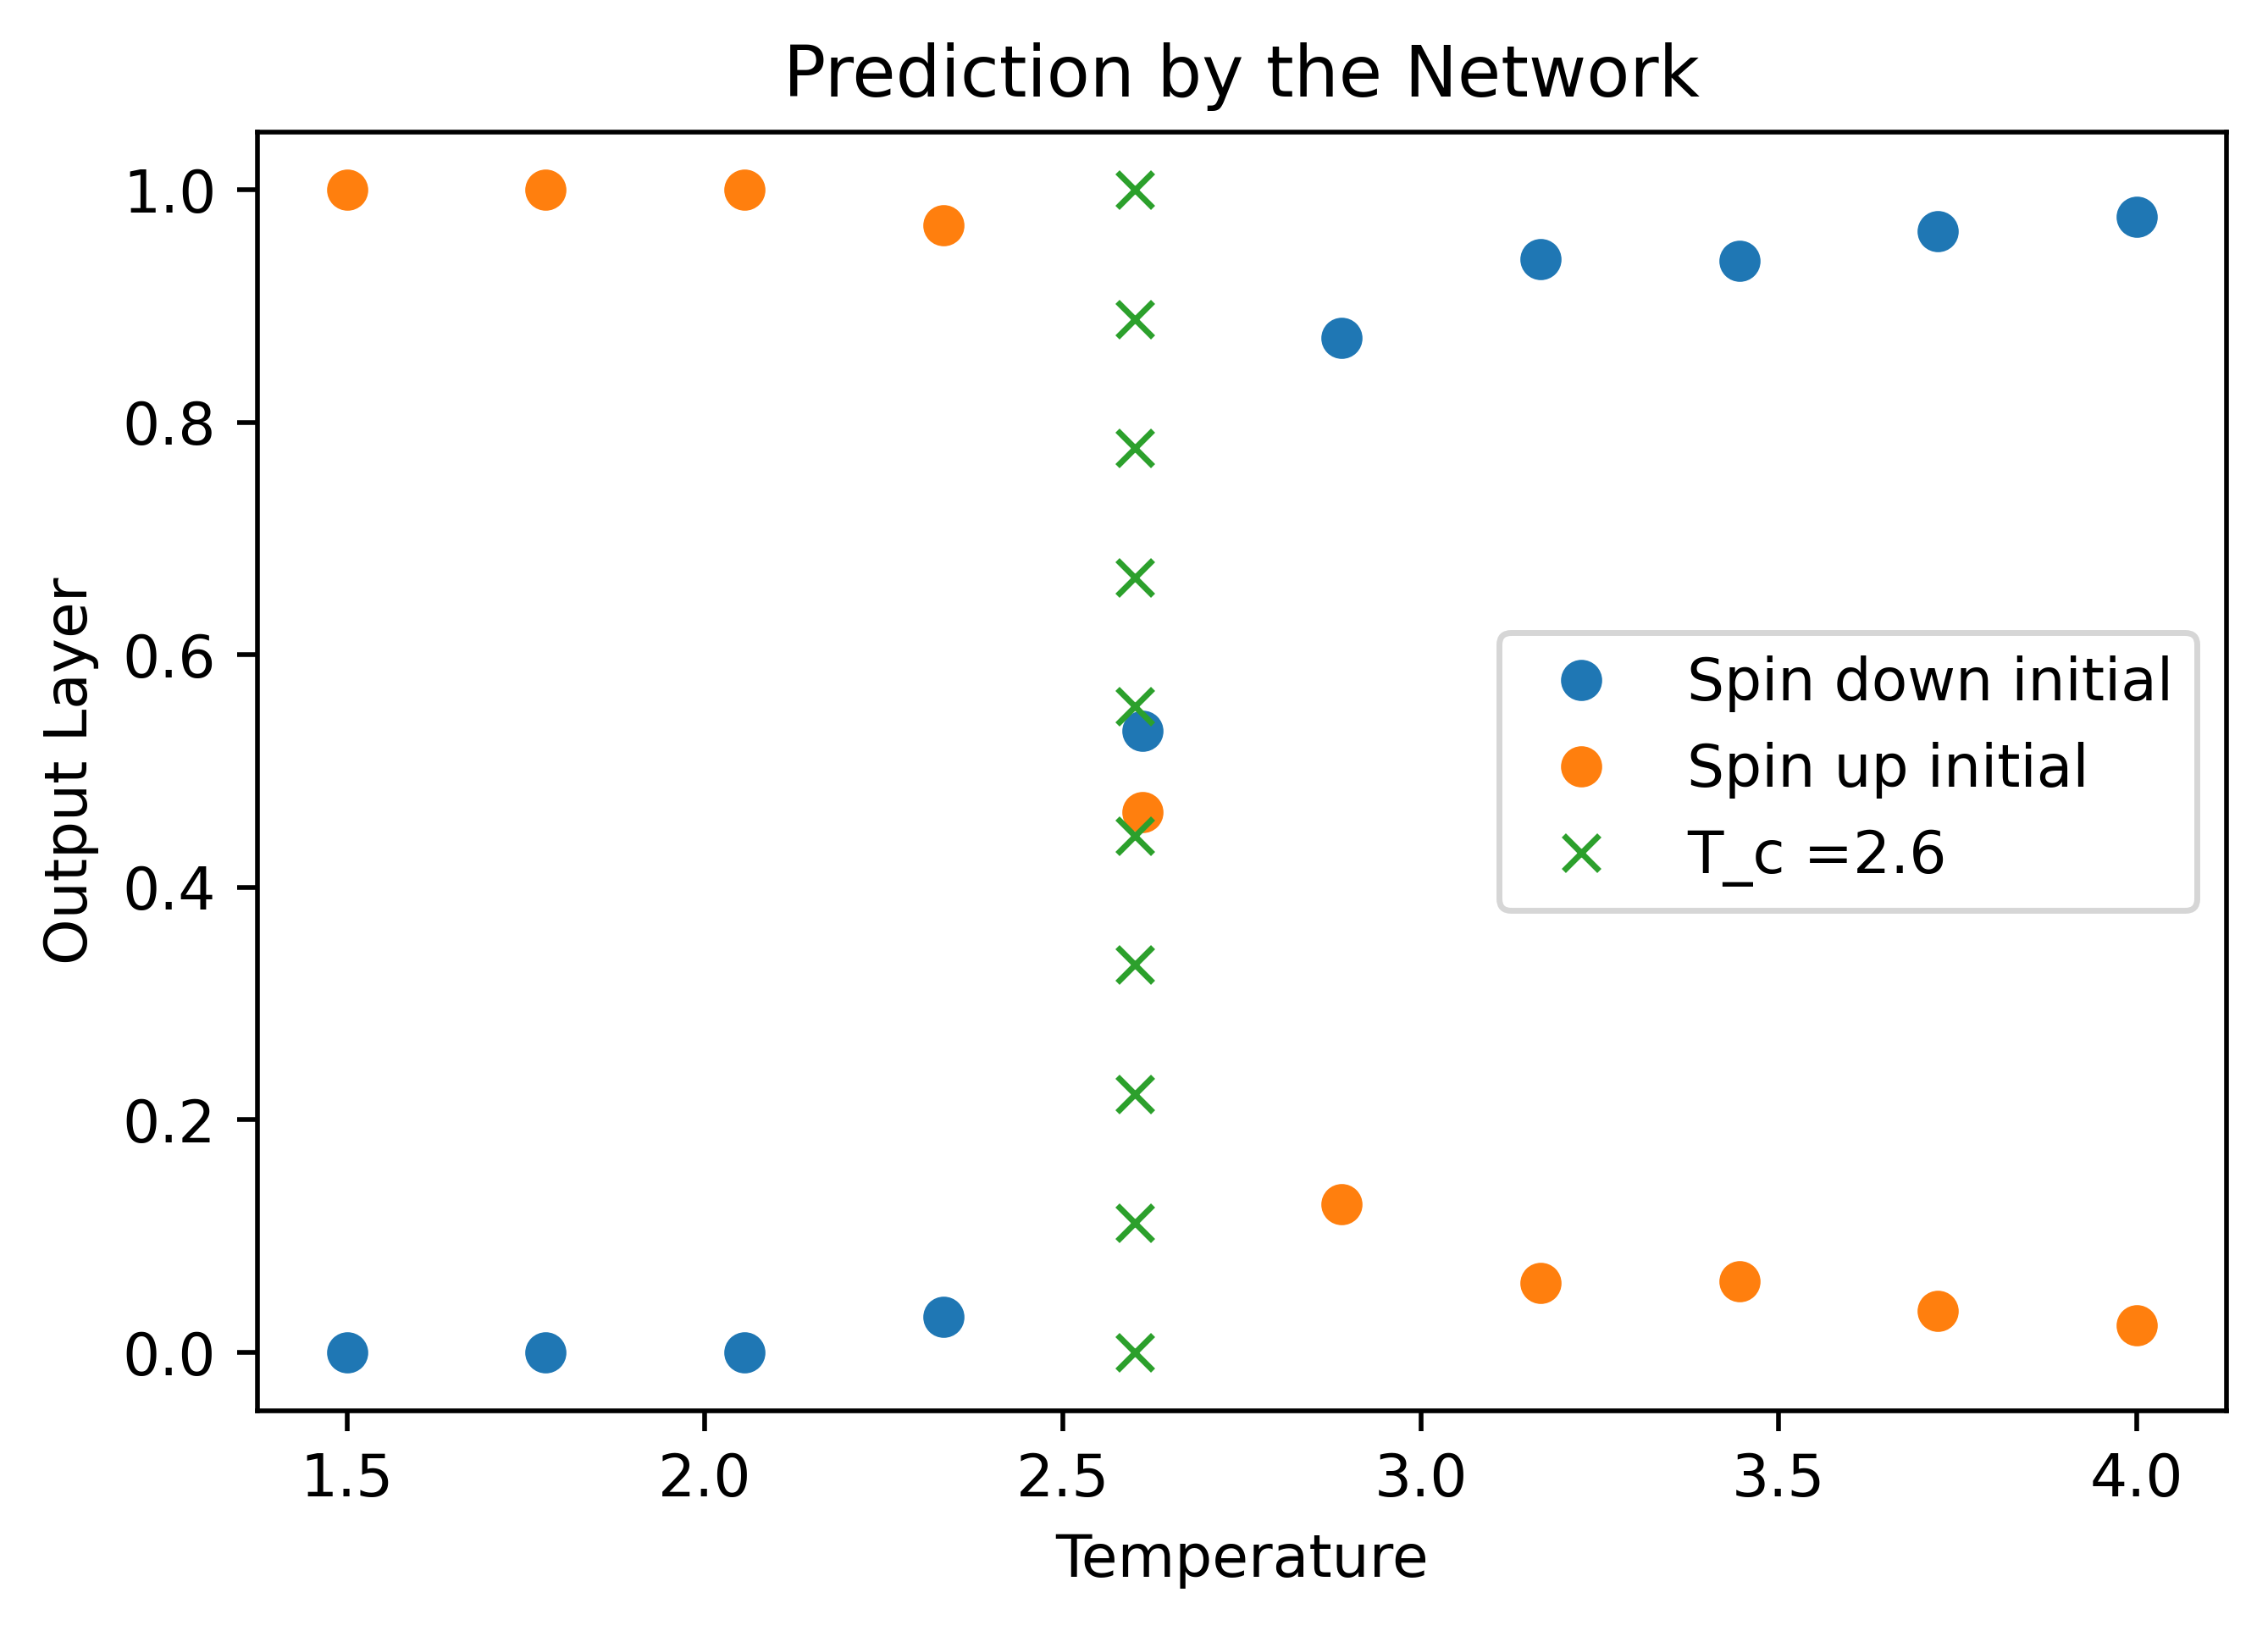

In [128]:
# Plot the averages
plt.figure(dpi = 500)
plt.plot(np.linspace(1.5,4.0, 10),avgs_merg_1,'o', label = 'Spin down initial')
plt.plot(np.linspace(1.5,4.0, 10),avgs_merg_0,'o', label = 'Spin up initial')
plt.plot(2.6*np.ones(10), np.linspace(0,1, 10),'x', label = 'T_c =2.6')
plt.ylabel('Output Layer')
plt.xlabel('Temperature')
plt.title('Prediction by the Network')
plt.legend()

**The prediction of the network is very close to the expected value of 2.6 however the model accuaracy leaves something to be desired** 

The intersection point of the scatter plots can be though of as the "point of maximum confusion of the model".

**Further Analysis and Findings**
    - If you use the true value of T_c = 2.26 the model accuracy reaches an acceptable point but the model still predicts a phase transition at T = 2.6  
    - This is slightly odd behavior of the model 
        - The model seems to very accurate on the wrong answer

Reference: https://www.nature.com/articles/nphys4035.